<a href="https://colab.research.google.com/github/Maheenms/GoogleCoLab/blob/main/BYO_Neural_Network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
%matplotlib inline
# Import our dependencies
import pandas as pd
import matplotlib as plt
from sklearn.datasets import make_blobs
import sklearn as skl
import tensorflow as tf

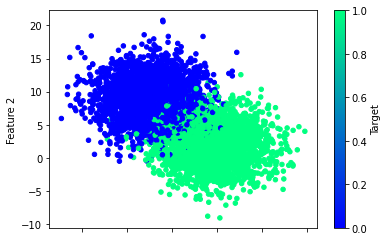

In [4]:
# Generate dummy dataset
X, y = make_blobs(n_samples=5000, centers=2, n_features=2, random_state=42, cluster_std=3)

# Creating a DataFrame with the dummy data
df = pd.DataFrame(X, columns=["Feature 1", "Feature 2"])
df["Target"] = y

# Plotting the dummy data
df.plot.scatter(x="Feature 1", y="Feature 2", c="Target", colormap="winter")

In [5]:
# Use sklearn to split dataset
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state =42)

In [6]:
# Create scaler instance
scaler = skl.preprocessing.StandardScaler()
# Fit the scaler
scaler.fit(X_train)

# Scale the data
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [7]:
# Create the Keras Sequential model
model = tf.keras.models.Sequential()

In [8]:
# Add our first Dense layer, including the input layer
model.add(tf.keras.layers.Dense(units = 5, activation = 'relu', input_dim = 2))

In [10]:
# Add the output layer that uses a probability activation function
model.add(tf.keras.layers.Dense(units =1, activation = 'sigmoid'))

In [11]:
# Check the structure of the Sequential model
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 5)                 15        
                                                                 
 dense_1 (Dense)             (None, 1)                 6         
                                                                 
Total params: 21
Trainable params: 21
Non-trainable params: 0
_________________________________________________________________


In [12]:
# Compile the Sequential model together and customize metrics
model.compile(loss ="binary_crossentropy", optimizer ="adam", metrics = ["accuracy"])

In [13]:
# Fit the model to the training data
modelFit = model.fit(X_train_scaled, y_train, epochs = 50)

Epoch 1/50
118/118 [==============================] - 1s 2ms/step - loss: 0.6761 - accuracy: 0.5509
Epoch 2/50
118/118 [==============================] - 0s 2ms/step - loss: 0.5272 - accuracy: 0.8277
Epoch 3/50
118/118 [==============================] - 0s 2ms/step - loss: 0.3920 - accuracy: 0.9187
Epoch 4/50
118/118 [==============================] - 0s 2ms/step - loss: 0.2928 - accuracy: 0.9400
Epoch 5/50
118/118 [==============================] - 0s 2ms/step - loss: 0.2302 - accuracy: 0.9459
Epoch 6/50
118/118 [==============================] - 0s 2ms/step - loss: 0.1928 - accuracy: 0.9472
Epoch 7/50
118/118 [==============================] - 0s 1ms/step - loss: 0.1699 - accuracy: 0.9469
Epoch 8/50
118/118 [==============================] - 0s 2ms/step - loss: 0.1553 - accuracy: 0.9480
Epoch 9/50
118/118 [==============================] - 0s 2ms/step - loss: 0.1461 - accuracy: 0.9483
Epoch 10/50
118/118 [==============================] - 0s 2ms/step - loss: 0.1401 - accuracy: 0.9488

In [14]:
# Evaluate the model using the test data
model_loss, model_accuracy = model.evaluate(X_test_scaled, y_test, verbose = 2)
print(model_loss)
print(model_accuracy)

40/40 - 0s - loss: 0.1149 - accuracy: 0.9584 - 194ms/epoch - 5ms/step
0.11489556729793549
0.9584000110626221


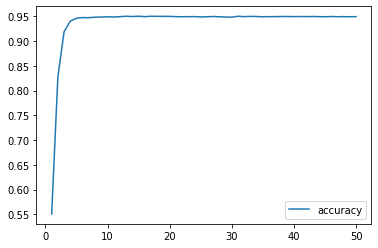

In [15]:
# Create a DataFrame containing training history
historyDF = pd.DataFrame(modelFit.history, index= range(1, len(modelFit.history["loss"])+1))
# Plot the accuracy

historyDF.plot(y = "accuracy")

